### MA3402 Estadística
## Tarea 3, Entrega 1: Estadística Bayesiana

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

**Integrantes:** Gaspar Herreros y Francisco Ramírez.

# Objetivo

El objetivo de esta tarea consiste en construir estimadores Bayesianos de una distribución muy conocida para ustedes: *La Pareto*. Se estudiarán las propiedades de los estimadores Bayesianos y los compararemos con los estimadores frecuentistas.

En este sentido, esta tarea se puede interpretar como una continuación de la tarea 1 entrega parcial 4.

# Estadística Bayesiana

Recordemos que en el contexto de la estadística, se asume que una variable aleatoria $X$ (que se pueden obtener muestras de este) sigue una ley desconocida $P_\theta \in \mathcal{M}_\theta$, donde $\mathcal{M}_\theta$ es el modelo paramétrico. En este contexto, el objetivo de esta disciplina es el de buscar el parámetro $\theta$ de esta ley.

Sin embargo, dado que $\theta$ es desconocido, este puede ser considerado como otra variable aleatoria, en donde el objetivo de la estadística Bayesiana sería encontrar la ley (posterior) de esta variable.

Pero asumir que $\theta$ puede ser aleatorio, no nos dice nada. ¿Cómo utilizamos las muestras de $X$? Para remediar este problema, se hace uso del teorema de Bayes:
$$
p(\theta \ |\ \bold{X}) = \frac{p(\bold X | \theta) p(\theta)}{p (\bold X)} \propto p(\bold X | \theta) p(\theta)
$$

Donde $\bold X = (x_1, \ldots x_n),\ x_i \sim X$ son muestras de la v.a. $X$. Aquí se pueden identificar varios elementos:
* $p(\theta)$ es la *distribución a priori* del parámetro $\theta$. Esta es la creencia de cómo distribuye $\theta$, al menos inicialmente.
* $p(\bold X | \theta)$ es la *verosimilitud* del parámetro $\theta$, el cuál se suele escribir por $\mathcal L(\theta; \bold X)$ para hacer énfasis que este es una función de $\theta$, y que los datos están "inyectados". Como los datos se encuentran dentro de la definición de la verosimilitud, se puede interpretar como una forma de determinar cuál parámetro es más verosimil dado los datos.
* $p(\bold X)$ la *evidencia*, que sirve como constante de normalización dado que no depende del parámetro $\theta$.

---

# Cálculo de la Posterior

Con este breve resumen, buscaremos calcular la ley posterior de una distribución $\mathrm{Pareto}(c, \alpha)$, donde $c$ es un parámetro conocido y $\alpha$ es desconocido.

Considere que se tiene un muestreo aleatorio simple $x_1, \ldots, x_n \sim \mathrm{Pareto}(\bar c, \alpha)$ donde $\bar c$ es un parámetro conocido y $\alpha$ es el parámetro que buscamos estimar. Recuerde que la función densidad de una Pareto está dada por:
$$
\mathrm{Pareto}(x ; c, \alpha) = \alpha c^{\alpha} \frac{1}{x^{\alpha+1}} \bold{1}_{x\geq c}
$$

Se asumirá que el prior del parámetro $\alpha$ distribuye como una $\mathrm{Gamma}(k_0, \lambda_0)$, donde $k_0$ y $\lambda_0$ son los *hiperparámetros del prior*. Recuerde además que la función distribución de una Gamma está dado por
$$
\mathrm{Gamma}(x; k, \lambda) = \frac{\lambda^k}{\Gamma(k)} x^{k-1} \exp(-\lambda x)
$$
Demuestre que la ley posterior de $\alpha$ viene dado por
$$
p(\alpha \ | \ \bold X) \sim \mathrm{Gamma}\left(k_0 + n, \lambda_0 + \sum_{i=1}^n \ln\left( \frac{x_i}{c} \right)\right)
$$
Y concluya que un prior conjugado de la Pareto para $c$ conocido y $\alpha$ desconocido es la distribución Gamma.

**Demostración**:

Calculemos la ley posterior de $\alpha$:

$$\begin{aligned}p(\alpha\mid \bold X)&=\frac{p(\bold X | \alpha) p(\alpha)}{p (\bold X)}\\&\propto p(\bold X | \alpha) p(\alpha)\\&=\frac{\lambda_0^{k_0}}{\Gamma(k_0)} \alpha^{k_0-1} \exp(-\lambda_0 \alpha)\prod_{i=1}^n\alpha c^{\alpha}\frac{1}{x_i^{\alpha+1}}\\&\propto\alpha^{k_0-1} \exp(-\lambda_0 \alpha)\prod_{i=1}^n\alpha c^{\alpha}\frac{1}{x_i^{\alpha+1}}\\&=\alpha^{k_0-1} \exp(-\lambda_0 \alpha)\prod_{i=1}^n\alpha c^{\alpha}\frac{1}{x_i^{\alpha+1}}\\&=\alpha^{k_0-1}\exp(-\lambda_0\alpha)\alpha^n\prod_{i=1}^n\frac{c^{\alpha}}{x_i^{\alpha+1}}\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(\ln\left(\prod_{i=1}^n\frac{c^{\alpha}}{x_i^{\alpha+1}}\right)\right)\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(\sum_{i=1}^n\ln\left(\frac{c^{\alpha}}{x_i^{\alpha+1}}\right)\right)\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(-\sum_{i=1}^n\ln\left(\frac{x_i^{\alpha+1}}{c^{\alpha}}\right)\right)\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(-\sum_{i=1}^n\left(\ln(x_i^{\alpha+1})-\ln(c^{\alpha})\right)\right)\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(-\sum_{i=1}^n\left((\alpha+1)\ln(x_i)-\alpha\ln(c)\right)\right)\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(-\sum_{i=1}^n\left(\alpha(\ln(x_i)-\ln(c))+\ln(x_i)\right)\right)\\&=\alpha^{k_0+n-1}\exp(-\lambda_0\alpha)\exp\left(-\alpha\sum_{i=1}^n\left(\ln(x_i)-\ln(c)\right)-\sum_{i=1}^n\ln(x_i)\right)\\&=\alpha^{k_0+n-1}\exp\left(-\lambda_0\alpha-\alpha\sum_{i=1}^n\left(\ln(x_i)-\ln(c)\right)\right)\exp\left(-\sum_{i=1}^n\ln(x_i)\right)\\&=\alpha^{k_0+n-1}\exp\left(-\left[\lambda_0+\sum_{i=1}^n\left(\ln(x_i)-\ln(c)\right)\right]\alpha\right)\exp\left(-\sum_{i=1}^n\ln(x_i)\right)\\&=\alpha^{k_0+n-1}\exp\left(-\left[\lambda_0+\sum_{i=1}^n\ln\left(\frac{x_i}{c}\right)\right]\alpha\right)\exp\left(-\sum_{i=1}^n\ln(x_i)\right)\\&\propto\alpha^{k_0+n-1}\exp\left(-\left[\lambda_0+\sum_{i=1}^n\ln\left(\frac{x_i}{c}\right)\right]\alpha\right)\\&\sim \mathrm{Gamma}\left(k_0 + n, \lambda_0 + \sum_{i=1}^n \ln\left( \frac{x_i}{c} \right)\right)\end{aligned}$$

Donde en los pasos en los que se usó $\propto$ se eliminaron $\frac{1}{p(\bold X)}, \frac{\lambda_0}{\Gamma(k_0)}$ y $\exp\left(-\sum_{i=1}^n\ln(x_i)\right)$ pues los $3$ valores son constantes (no dependen de $\alpha$).

$$\therefore p(\alpha \ | \ \bold X) \sim \mathrm{Gamma}\left(k_0 + n, \lambda_0 + \sum_{i=1}^n \ln\left( \frac{x_i}{c} \right)\right)$$

De esta manera, como la posterior $p(\alpha\mid\bold X)$ pertenece a la misma familia que el prior $p(\alpha)$ (es decir, ambas tienen una densidad de probabilidad definida por la misma forma funcional, en este caso una Gamma), entonces un prior conjugado de la Pareto para $c$ conocido y $\alpha$ desconocido es la distribución Gamma.

$\square$

# Importación de librerías y funciones útiles

Importaremos algunas librerías útiles que utilizaremos en el notebook.

In [ ]:
# Librerías

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats  # Librería útil para Python
import seaborn as sns  # Gráficos bonitos
from pathlib import Path  # Para hacer rutas agnósticas al sistema operativo

# Semilla para hacer resultados replicables
np.random.seed(seed=42)

# Para tener gráficos bonitos
sns.set_theme(
    context="notebook", 
    style="darkgrid", 
)

Al igual que en la Tarea 1 Entrega 4, utilizaremos `Firmas_Grandes.csv`. Cómo se mencionó en esa tarea, este es un dataset que contiene los datos de las 500 empresas más grandes del mundo, según su valor de mercado. 

Las siguientes líneas sirven para importar el dataset que utilizaremos.

In [ ]:
# Descomentar si se quiere ajustar utilizando este dataset
# DATA_NAME, COL_NAME = "CiudadesUS.csv", "pop2023"
DATA_NAME, COL_NAME = "Firmas_Grandes.csv", "Market Value"

# Cambia aquí dependiendo de la carpeta en donde guardas los datos
DATA_FOLDER_PATH = Path(".")
DATA_PATH = DATA_FOLDER_PATH / Path(DATA_NAME)
DATA_PATH

PosixPath('Firmas_Grandes.csv')

In [ ]:
df = pd.read_csv(DATA_PATH, usecols=[COL_NAME])
df.rename(columns={COL_NAME: "values"}, inplace=True)
print(f"{len(df) = }")
df.head()

len(df) = 500


,values
0,1684765.0
1,1359028.0
2,1285516.0
3,1233351.0
4,919284.0


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

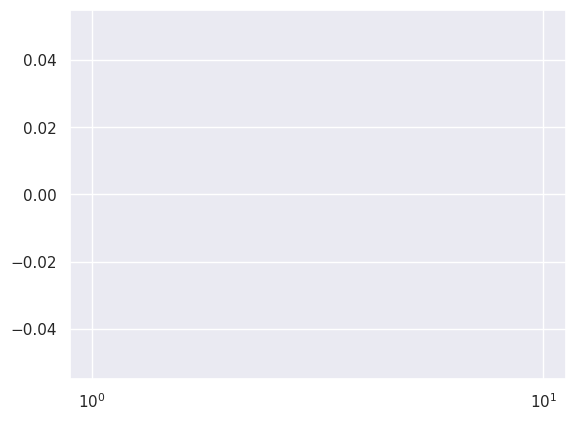

In [ ]:
# Para visualizar los datos
sns.histplot(data=df, log_scale=True)
plt.show()

Dejamos los datos en un cómodo arreglo `X` y definimos $\bar c = \min(\bold X)$ con la variable `C`.

In [ ]:
X = np.array(df["values"])
C = X.min()
np.random.shuffle(X)  # Mezclamos el arreglo pues estos venían ordenados



Por último, definimos una función auxiliar que reciba el número de datos $n$ que se desean utilizar.

In [ ]:
def init_data(n=None, data=None, c=None):
    """
    Inicializa `n` datos de `data`. `c` es la constante de la Pareto.
    En caso de que alguno de los datos no sean proporcionados, se infiere su valor.
    
    En caso de que `n` no se provea, se asume que se toman todos los datos.
    En caso de que `data` no se provea, se asume que es el dataset global `X`.
    En caso de que `c` no se provea, se asume que es la constante global `C`.
    """
    data = data if data is not None else X.copy()
    c = c if c is not None else C
    n = n if n is not None else len(data)
    data = data[:n]

    return n, data, c

n, data, c = init_data(200)
assert n == 200
assert len(data) == 200
assert c == C

---

# Visualizando la Posterior

## Actualizando la posterior

En esta sección observaremos el efecto de actualizar la posterior con nuevos datos. 

Para modelar la posterior del parámetro $\theta$, **utilizaremos las variables aleatorias de scipy**. La mayor ventaja de utilizar este módulo, es que permite modelar las variables aleatorias de una forma muy sencilla, en la que se puede consultar varias propiedades de esta (sólo por poner algunos ejemplos, se puede consultar la función de densidad de probabilidad, la mediana, ¡e incluso se puede integrar con respecto a la v.a!)

Para ello, empiece programando una función que, dado el número de datos `n` y los hiperparámetros necesarios, retorne una instancia "congelada" de [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma). 

**Indicación**: Investigue la forma de parametrizar una Gamma en scipy. Abajo hay un ejemplo para "congelar" una variable aleatoria.

In [ ]:
# Ejemplo para una v.a. congelada
norm_rv = stats.norm(loc=5, scale=2)  # ~ N(5, 2^2)
print(norm_rv.rvs(5))
print(f"{norm_rv.std() = }, {norm_rv.mean() = }")

[5.00362722 6.51187056 8.86708526 5.82774967 6.13553674]
norm_rv.std() = 2.0, norm_rv.mean() = 5.0


In [ ]:
# Constantes de un prior uniforme
K, LAMB = 1, 0

def alpha_post(n=None, data=None, c=None, k=K, lamb=LAMB, return_params=False):
    """
    Retorna la variable aleatoria de la ley posterior del parámetro alpha.
    """
    n, data, c = init_data(n, data, c)

    # Completar aquí!
    params = k_post, lamb_post = (n+k, lamb + sum([math.log(x/c) for x in data])) # Resultado demostrado en la parte 2.
    rv = stats.gamma(a=k_post, loc=0, scale=1/lamb_post) # Visto en la documentación provista.

    if return_params:
        return rv, params

    return rv

gamma_rv, (k_post, lamb_post) = alpha_post(n=100, return_params=True)
# Debería de imprimir números
print(f"{k_post = }, {lamb_post = }")
# Debería de retornar un float y un arreglo
gamma_rv.pdf(0.5), gamma_rv.rvs(10)

k_post = 101, lamb_post = 85.24640885968273


(2.595730841140052e-12,
 array([1.19841701, 1.22185099, 1.29329457, 1.06327995, 1.20509752,
        1.3198332 , 1.23427298, 1.07997386, 1.10047325, 1.00835712]))

Ahora estudiaremos cómo evoluciona la posterior con respecto al número de datos. Para esto, utilice la función `plot_posterior_evolution` para graficar la función de densidad de probabilidad de la posterior. Grafique para $n \in \{1, 10, 50, 100, 500\}$ y con un prior no-informativo (esto es, tomando $k=1$ y $\lambda = 0$), entre $x_{min}=0$ y $x_{max}=2.5$. Además, obtenga el promedio y desviación estándar de la posterior y regístrelo en una tabla.

Puede ser de utilidad el método [`pd.DataFrame.to_markdown`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_markdown.html) para incluir tablas en celdas de texto.

In [ ]:
def plot_posterior_evolution(n_list, x_min=0, x_max=2.5, k=K, lamb=LAMB, **kwargs):
    fig, ax = plt.subplots(1, 1)

    mean_list, std_list = [], []

    for n in n_list:
        alpha_post_rv = alpha_post(n, k=k, lamb=lamb,)

        mean_list.append(alpha_post_rv.mean())
        std_list.append(alpha_post_rv.std())

        x_ = np.linspace(x_min, x_max, 200)
        ax.plot(x_, alpha_post_rv.pdf(x_), label=f"{n = }")

    ax.legend()

    df_stats = pd.DataFrame({
        "n": n_list,
        "mean": mean_list,
        "std": std_list,
    })

    df_stats.set_index("n", inplace=True)

    return df_stats

|   n |    mean |       std |
|----:|--------:|----------:|
|   1 | 6.72327 | 4.75407   |
|  10 | 1.42451 | 0.429507  |
|  50 | 1.09494 | 0.153322  |
| 100 | 1.1848  | 0.117892  |
| 500 | 1.23601 | 0.0552207 |


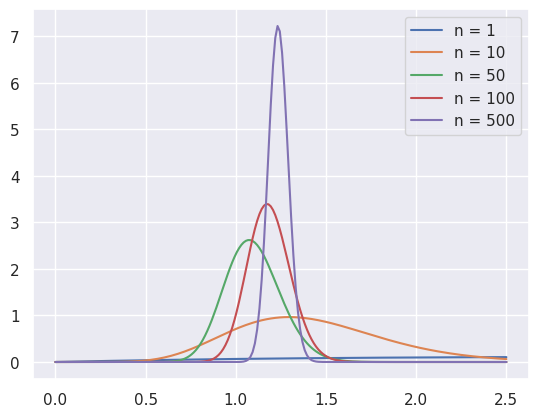

In [ ]:
# Definimos la lista de valores de n
n_list=[1,10,50,100,500]

# Guardamos en una variable el resultado de la función evaluada en la lista de valores de n con k=1 y lambda=0
df_stats = plot_posterior_evolution(n_list=n_list)

# Mostramos la tabla y la gráfica generadas por la función
print(df_stats.to_markdown())

|   n |    mean |       std |
|----:|--------:|----------:|
|   1 | 6.72327 | 4.75407   |
|  10 | 1.42451 | 0.429507  |
|  50 | 1.09494 | 0.153322  |
| 100 | 1.1848  | 0.117892  |
| 500 | 1.23601 | 0.0552207 |

**¿Qué sucede con valores pequeños de $n$?**
*Respuesta:* 

Para valores pequeños de $n$, se puede observar que la distribución graficada tiene mucha varianza. Es decir, hay una poca precisión acerca de la estimación del parámetro $\alpha$ que se está haciendo. De cierta manera la distribución es más inestable con respecto a las fluctuaciones de los datos. Esto se debe a que como hay una menor cantidad de datos en los que basarse para decidir el parámetro asociado a la distribución que siguen los datos originales, entonces la posteriori puede verse sesgada por valores atípicos de la distribución en vez de hacer una buena aproximación.

---
**¿Y cón valores altos de $n$?**
*Respuesta:* 

Para valores altos de $n$ sucede lo contrario. Es decir, la distribución graficada tiene una varianza pequeña, y por ende, existe una cierta precisión acerca de la estimación del parámetro que queremos estimar. La distribución se hace cada vez más estrecha y disminuye la incerteza que teníamos sobre el parámetro $\alpha$ a estimar, teniendo ahora un intervalo mucho más acotado en el cual éste se debería encontrar.

---
**¿Observa alguna tendencia de lo que ocurre si $n$ tiende a infinito?**
*Respuesta:*

Cuando $n\to\infty$, la distribución parece aproximarse a una delta de Dirac en el valor verdadero del parámetro $\alpha$. Es decir, parece aproximarse a la función:

$$f(x)=\begin{cases}\infty &\text{si } x=\alpha\\0 &\text{si }x\neq\alpha\end{cases}$$

Esto se debe a que si tuviésemos una cantidad infinita de datos podríamos tener una certeza del $100\%$ sobre el valor de $\alpha$ que queremos estimar. Es decir, si $n$ fuese infinito, podríamos saber con prácticamente toda seguridad cuál es el valor del parámetro a estimar. Este valor pareciera ser un número entre $1.23$ y $1.24$.


Ahora simularemos lo que sucede cuando introducimos "conocimiento experto" al prior. Para esto, seguiremos estos pasos:

1. Calculamos la **mediana** $x_m$ (no el promedio) de los primeros 50 datos de $\bold X$ (esto lo hacemos porque en estos datos hay muchos *outliers*). Esto simula que sólo tenemos conocimiento de los primeros 50 datos, y no conocemos el resto de datos.
2. Definimos $\bar \alpha = \log(c) / \log(x_m / \bar c)$ (se obtiene imponiendo $x_m = c \sqrt[\alpha]{2}$, donde la parte derecha es la mediana de una Pareto).
3. Obtenemos $k=15$ muestras $\tilde x_1, \ldots, \tilde x_{k}$ de forma que $\tilde x_i \sim \mathrm{Pareto}(\bar c, \bar \alpha)$.
4. Utilizamos $k_0 = k + 1$ y $\lambda_0 = \sum_{i=1}^{k} \ln \left(\tilde x_i / \bar c\right)$ como hiperparámetros para el prior.

Estos pasos se encuentran implementados en la función `estimate_hyperparameters`.

In [ ]:
# Cálculo de los hiperparámetros k y lambda

def estimate_hyperparameters(k, n=50, data=None, c=None, seed=None):
    n, data, c = init_data(n, data, c)

    x_m = np.median(data)
    alph = np.log(2) / np.log(x_m / C)
    x_tilde = stats.pareto.rvs(alph, scale=C, size=k, random_state=seed)
    lamb = np.log(x_tilde / C).sum()

    return k+1, lamb

# Aquí asignamos k y lambda
k_, lamb_ = estimate_hyperparameters(15, seed=42)
k_, lamb_

(16, 10.677791957233872)

Grafique las funciones de densidad de probabilidad utilizando estos hiperparámetros, como en la parte anterior.

|   n |    mean |       std |
|----:|--------:|----------:|
|   1 | 1.54894 | 0.375672  |
|  10 | 1.41306 | 0.277125  |
|  50 | 1.15272 | 0.141891  |
| 100 | 1.20929 | 0.11228   |
| 500 | 1.24034 | 0.0546029 |


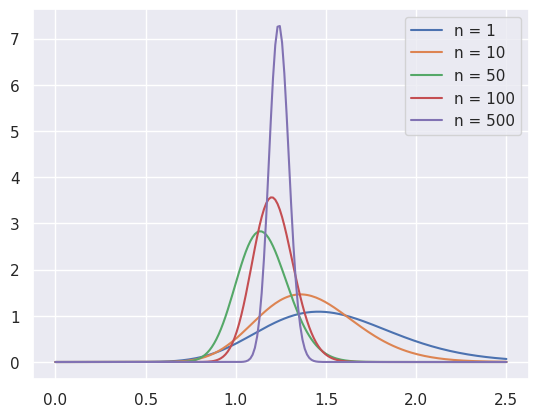

In [ ]:
# Guardamos en una variable el resultado de la función evaluada en la lista de valores de n con los
# hiperparámetros obetnidos en la parte anterior.
df_stats_ = plot_posterior_evolution(n_list=n_list, k=k_, lamb=lamb_)

# Mostramos la tabla y la gráfica generadas por la función.
print(df_stats_.to_markdown())

|   n |    mean |       std |
|----:|--------:|----------:|
|   1 | 1.54894 | 0.375672  |
|  10 | 1.41306 | 0.277125  |
|  50 | 1.15272 | 0.141891  |
| 100 | 1.20929 | 0.11228   |
| 500 | 1.24034 | 0.0546029 |

**¿Cómo se compara el gráfico con el caso del prior no-informativo? ¿Hubo alguna mejora? Puede cambiar el número de datos y el $k_0$ para concluir mejor**
*Respuesta:* 

Ahora en el gráfico se puede notar que las diferentes curvas son mucho más estrechas para los distintos valores de $n$. Esta estrechez se ve mucho mejor para valores pequeños de $n$, y para valores grandes de $n$, si bien es cierto que los gráficos igualmente son más estrechos, no se ve una diferencia tan considerable con respecto al caso del prior no-informativo. Es decir, se ve una mejora considerable con respecto al caso del prior no-informativo en términos de la varianza de las curvas generadas. Mejora la cual se nota mucho más para valores más chicos de $n$, y es cada vez más despreciable a medida que aumentamos el valor de $n$ (aunque siempre hay una mejora de todas maneras). Esto se traduce es que hay menos incertidumbre sobre el parámetro $\alpha$ a estimar, e incluso con pocos datos de la muestra ya podemos tener una certeza considerable con respecto a dónde se encuentra nuestro parámetro a estimar. En el caso del prior con información experta tenemos un intervalo mucho más acotado donde debería estar nuestro parámetro a estimar con respecto al caso del prior no-informativo.

## Comparándo con los datos

Si bien tenemos que la estimación del parámetro es ahora una distribución de probabilidad, nos falta un pequeño detalle: ¿cómo escogemos un parámetro a partir de este? Una opción es muestrear $\tilde\alpha \sim p(\alpha \ |\ \bold X)$ y utilizar el modelo $\mathrm{Pareto}(\bar c, \tilde\alpha)$ como aquella que explica a $X$. 

Sin embargo, ¿Qué sucede si la posterior tiene mucha varianza? Es aquí en donde obtener la precisión se hace relevante (que, dicho sea de paso, la precisión está definida como la inversa de la varianza $t = \frac{1}{\sigma^2}$). La precisión nos puede decir acerca de *qué tan confiado está nuestro modelo de su estimación*, que en contraste con el enfoque frecuentista, esto no sucede.

Para visualizar esto, vamos a comparar la distribución que generan los datos reales (esto lo haremos a través de un histograma, normalizado para que integre 1) y lo compararemos con las gráficas de las funciones de distribución de probabilidad utilizando parámetros aleatorios muestreados de la posterior. Es decir, se muestrarán $\alpha_1,\ldots, \alpha_\ell \sim p(\alpha \ |\ \bold X)$ y se graficarán las funciones de distribución de las leyes $\mathrm{Pareto}(\bar c, \alpha_i),\ \forall i = 1,\ldots, \ell$.

Para realizar los gráficos, se definirá una función `plot_data_models` que grafica el histograma de los datos y que grafica las curvas de las $\mathrm{Pareto}(\bar c, \alpha_i)$ con $\alpha_1, \ldots, \alpha_\ell \sim \mathrm{Gamma}(k_0 + n,\ \lambda_0 + \sum_{i=1}^n \ln (x_i / \bar c))$. Se incluye además, destacado en rojo, la curva de la Pareto en donde se utiliza el promedio de la posterior, y la precisión de la posterior(esto es $t_n = \frac{1}{\sigma_n^2}$ con $\sigma_n^2=\mathbb{V}_{\alpha \sim p(\alpha | \bold X^{(n)})}[\alpha]$) en el título del gráfico.

Note que los parámetros $n$, $k_0$, $\lambda_0$ son modificables.

In [ ]:
def plot_data_models(n=None, k=K, lamb=LAMB, ell=1_000, data=None, c=None, **kwargs):
    n, data, c = init_data(n, data, c)
    alpha_post_rv, (k, lamb) = alpha_post(n, data, c, k, lamb, return_params=True)
    alphas_samples = alpha_post_rv.rvs(ell)

    fig, ax = plt.subplots(1, 1)

    ax = sns.histplot(
        data=df,
        stat="density",
        bins=np.logspace(np.log(c), np.log(np.max(X)), 30, base=math.e),
        ax=ax,
    )

    _, x_max = ax.get_xlim()

    x_ = np.linspace(c, x_max, 100)

    for alpha in alphas_samples:
        pareto_rv = stats.pareto(alpha, scale=c)

        ax.plot(x_, pareto_rv.pdf(x_), "b", alpha=0.01) 

    alpha_mean = alpha_post_rv.mean()
    pareto_rv = stats.pareto(alpha_mean, scale=c)
    ax.plot(x_, pareto_rv.pdf(x_), "r--", label="Curva promedio") 

    ax.set_title(f"$n = {n}$, $t_n = {1/alpha_post_rv.var():.2f}$")
    ax.set_xlabel("Market Values")
    ax.legend()

    plt.yscale("log")
    plt.xscale("log")

Grafique para $n \in \{1, 10, 500\}$ utilizando el prior no-informativo $k=1, \lambda=0$ y el prior estimado anteriormente utilizando "información experta". Puede graficarlos todos juntos (modificando, extendiendo o inspirándose de la función anterior), o en gráficos separados.

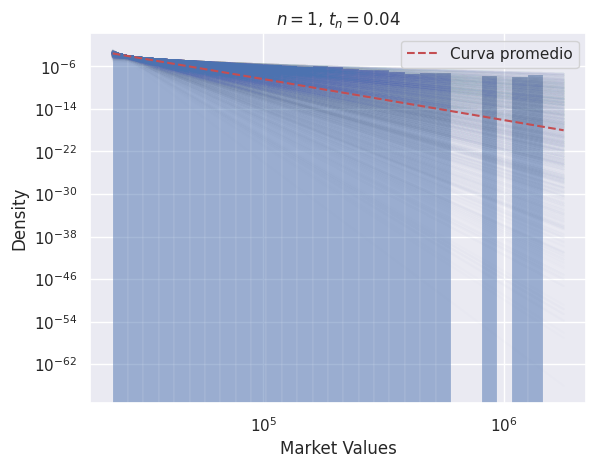

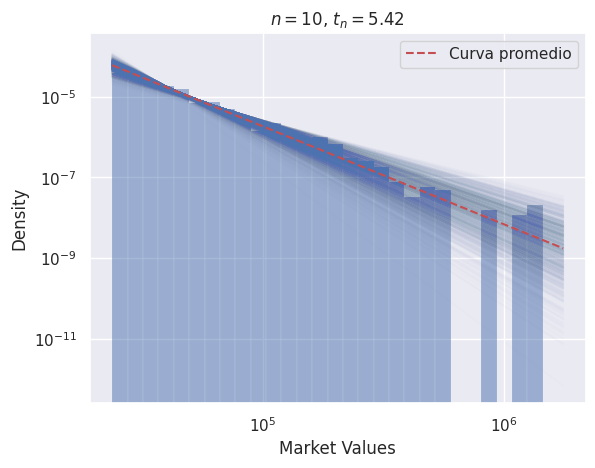

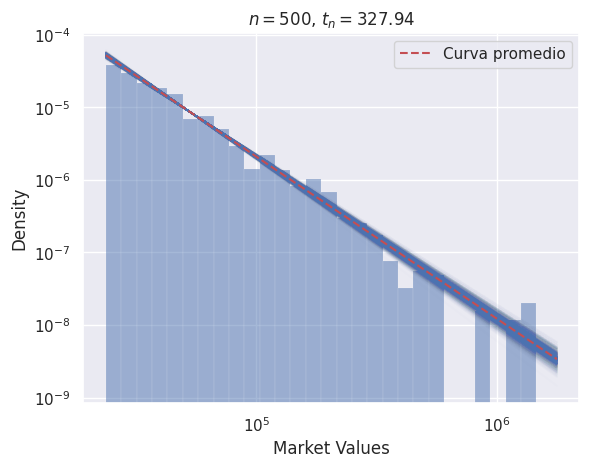

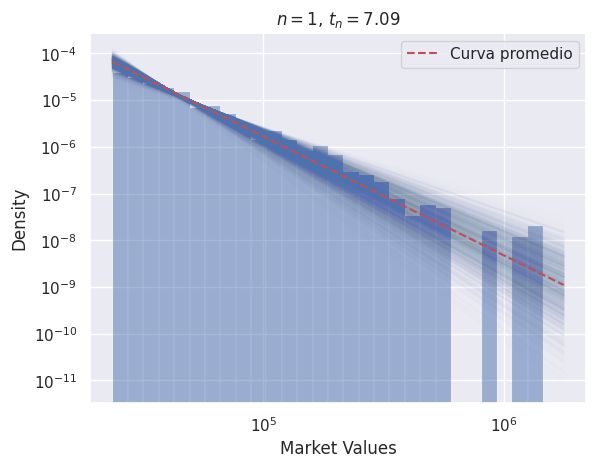

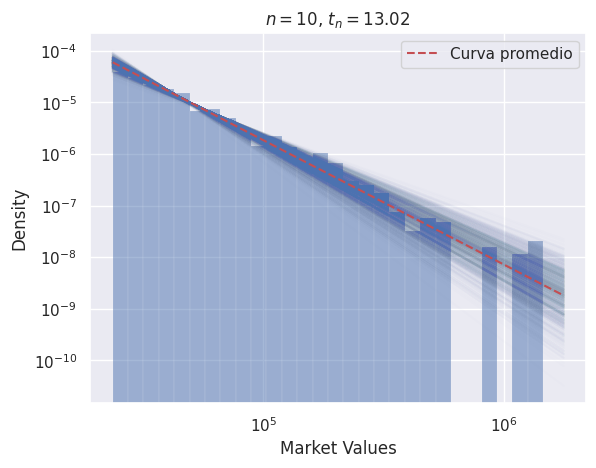

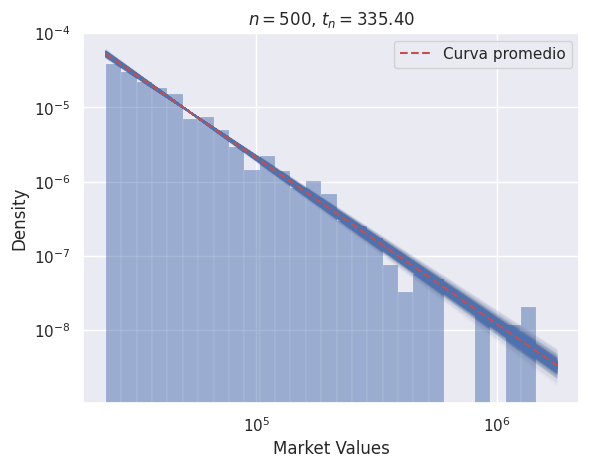

In [ ]:
# Gráficos para el prior no-informativo
plot_data_models(1)
plot_data_models(10)
plot_data_models(500)

# Gráficos utilizando información experta
plot_data_models(1,k_,lamb_)
plot_data_models(10,k_,lamb_)
plot_data_models(500,k_,lamb_)

**¿Qué sucede cuando aumenta $n$ en ambos casos?**
*Respuesta*: 

A medida que aumenta el valor de $n$, en ambos casos se puede notar que el valor de $t_n$ aumenta. Es decir, mientras más datos tenemos en consideración, más precisión tenemos en la estimación que estamos haciendo. En otras palabras, nuestro modelo, a medida que aumentamos el valor de $n$, está cada vez más confiado de su estimación. Gráficamente, esto se puede notar en que la curva promedio se ajusta cada vez mejor a los datos reales mientras aumentamos el valor de $n$.

---
**¿Qué sucede cuando se utilizan los hiperparámetros estimados $k_0$ y $\lambda_0$? ¿Nota algún cambio con respecto al prior no-informativo?**
*Respuesta*: 

Cuando se utilizan los hiperparámetros estimados $k_0$ y $\lambda_0$, obtenemos una mayor precisión para los mismos valores de $n$ con respecto al usar un prior no-informativo. Este aumento en la precisión es mucho más considerable para valores pequeños de $n$. De hecho, para $n=1$, con los hiperparámetros $k_0$ y $\lambda_0$ obtenemos una precisión aproximadamente $177$ veces mayor que con el prior no-informativo, mientras que para $n=10$ esta precisión es aproximadamente $2.4$ veces mayor, y para $n=500$ es tan solo $1.02$ veces mayor. Es decir, la diferencia entre usar información experta y un prior no informativo se hace cada vez más despreciable mientras aumentamos el valor de $n$ (aunque siempre hay una diferencia como tal). Gráficamente, esto se ve reflejado en que para un mismo valor de $n$, la curva promedio se ajusta de mejor manera en el prior con información experta que en el prior no-informativo. Esta diferencia en el ajuste se puede observar mucho mejor para $n=1$ y $n=10$, mientras que para $n=500$ esta diferencia casi no se nota.

---

# Estimadores

En esta seeción estudiaremos la naturaleza de los distintos estimadores que se pueden construir a partir de la distribución posterior, y lo compararemos con el estimador de máxima verosimilitud. A continuación se definen los estimadores a utilizar:
$$
\begin{aligned}
\hat \alpha_{MLE}^{(n)} &\in \mathrm{arg} \max_\alpha p(\bold X^{(n)} \ |\ \theta)\\
\hat \alpha_{MAP}^{(n)} &\in \mathrm{arg} \max_\alpha p(\theta \ |\ \bold X^{(n)})\\
\hat \alpha_{mean}^{(n)} & = \mathbb{E}_{\theta \sim p(\theta \ |\ \bold X^{(n)})} \left[\theta \right] = \int \theta p(\theta \ |\ \bold X^{(n)}) \mathrm{d}\theta \\
\hat \alpha_{median}^{(n)} & = q_{p(\theta \ |\ \bold X^{(n)})}(0.5) = F_{p(\theta \ |\ \bold X^{(n)})}^{-1}(0.5)
\end{aligned}
$$

Donde se utiliza la notación $\bold X^{(\ell)} = (x_1, \ldots, x_\ell)$ para los primeros $\ell$ datos.

El primer estimador es el *estimador de máxima verosimilitud* (el que ya conocen muy bien), mientras que los otros tres estimadores son inherentes a la distribución posterior. Por ejemplo, para el segundo estimador, se utiliza la moda de la posterior, estimador que también se suele llamar *máximo a posteriori*. El tercer estimador utiliza el promedio de la posterior, y el último estimador utiliza la mediana.

En esta sección se pide programar una función que calcule los cuatro estimadores para la posterior en un diccionario. No es necesario calcular los resultados anteriores de forma analítica. Puede investigar cuales son el promedio, la mediana y la moda de una Gamma, o bien, utilizar los métodos de [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)

Recuerde que el estimador de máxima verosimilitud de una Pareto (con $c$ conocido) se vió en una tarea anterior (incluso en el auxiliar) y viene dado por
$$
\hat \alpha_{MLE}^{(n)} = \frac{n}{\sum_{i=1}^{n} \ln\frac{x_i}{c}}
$$

In [ ]:
def alpha_estimators(n=None, k=K, lamb=LAMB, data=None, c=None):
    n, data, c = init_data(n, data, c)
    estimators = dict()

    # MLE
    estimators["mle"] = n/(sum([math.log(x/c) for x in data]))

    # Mode
    estimators["map"] = (k+n-1)/(lamb+sum([math.log(x/c) for x in data]))

    # Mean
    estimators["mean"] = (k+n)/(lamb+sum([math.log(x/c) for x in data]))

    estimators["median"] = stats.gamma.ppf(0.5, k+n, loc=0, scale=1/(lamb+sum([math.log(x/c) for x in data])))

    return estimators

La función `plot_estimators` grafica el histograma de los datos junto con las funciones de densidad de probabilidad para cada uno de los estimadores (es decir, grafica una $\mathrm{Pareto}(\bar c, \hat \alpha)$ con $\hat\alpha \in\{\hat\alpha^{(n)}_{MLE}, \hat\alpha^{(n)}_{MAP}, \hat\alpha^{(n)}_{mean}, \hat\alpha^{(n)}_{median}\}$)

Utilizando esta función, grafique para $n = 2$ con los priors no-informativos y de "información experta".

In [ ]:
def plot_estimators(n=2, k=K, lamb=LAMB, data=None, c=None, **kwargs):
    n, data, c = init_data(n, data, c)
    alpha_ests = alpha_estimators(n, k, lamb, data, c)

    fig, ax = plt.subplots(1, 1)

    ax = sns.histplot(
        data=df,
        stat="density",
        bins=np.logspace(np.log(c), np.log(np.max(X)), 30, base=math.e),
        ax=ax,
    )

    _, x_max = ax.get_xlim()

    x_ = np.linspace(c, x_max, 100)

    for est_name in alpha_ests:
        pareto_rv = stats.pareto(alpha_ests[est_name], scale=c)

        ax.plot(x_, pareto_rv.pdf(x_), label=est_name) 
    if k==k_ and lamb==lamb_: # Se agregó esto para ponerle título con información experta.
        ax.set_title("Prior con información experta para "f"$n = {n}$")
    else: # Se agregó esto para ponerle título con prior no informativo.
        ax.set_title("Prior no-informativo para "f"$n = {n}$")
    ax.set_xlabel("Market Values") # Se agregó esto para ponerle título al eje x.
    ax.legend()

    plt.yscale("log")
    plt.xscale("log")

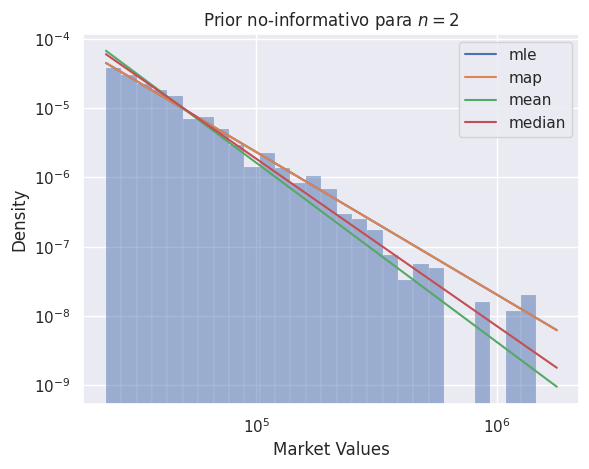

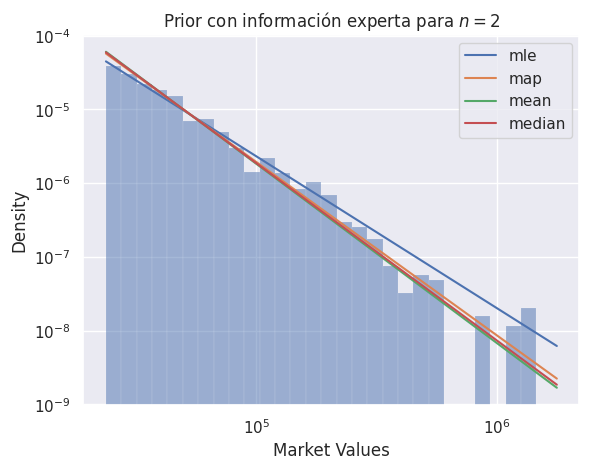

In [ ]:
plot_estimators()
plot_estimators(k=k_,lamb=lamb_)

**¿Qué sucede con el ajuste a los datos reales? ¿En qué caso se ajustan mejor?**
*Respuesta*: 

En el caso que se utiliza $k=1$ y $\lambda=0$, es decir, el prior no informativo, se ve como las densidades utilizando los valores de $\alpha$ estimados con median y mean no se ajustan realmente a los valores, y el estimador mle y map (que son iguales) se ajustan de buena manera. En cambio, cuando se utiliza el prior de información experta, las densidades para los distintos alpha se parecen (exeptuando mle), pero aún así hay carencias a la hora de ajustarse a los datos. Cabe destacar que el parámetro alpha que mejor estima la densidad de la variable aleatoria para $n=2$ es el mle en este caso (o al menos de forma visual), que es el mismo en ambos casos, informativo y no informativo.

Consideremos ahora los estimadores $\hat \alpha^{(n)}_{MLE}$ y $\hat \alpha^{(n)}_{MAP}$. La función `plot_abs_error` grafica la diferencia absoluta entre los dos estimadores en función de $n$ (esto es, grafica la función $n \mapsto |\hat \alpha^{(n)}_{MLE} - \hat \alpha^{(n)}_{MAP}|$). 

Utilizando esta función, grafique la diferencia absoluta para los dos tipos de priors y para un $k_0$ y $\lambda_0$ cualquiera (pero distintos a los otros dos).

**Hint**: Puede ser útil iniciar de un $n_{inicial}$ (por ejemplo, $n_{inicial}=50$) para apreciar mejor los resultados.

In [ ]:
def plot_abs_error(k=K, lamb=LAMB, init=0, last=500):
    mle_ests = []
    map_ests = []

    for n in range(1, last+1):
        estimators = alpha_estimators(n, k=k, lamb=lamb)
        mle_ests.append(estimators["mle"])
        map_ests.append(estimators["map"])

    mle_ests = np.array(mle_ests)
    map_ests = np.array(map_ests)

    x = np.arange(init, last)
    plt.plot(x, np.abs(mle_ests - map_ests)[init:])

    # Se agregó esto para ponerle título al gráfico y a los ejes.
    plt.xlabel(f'$n$')
    plt.ylabel('Diferencia absoluta')
    plt.title('Diferencia absoluta entre ' r'$\hat{\alpha}^{(n)}_{MLE}$' ' y ' r'$\hat{\alpha}^{(n)}_{MAP}$' ' en función de ' f'$n$')


    plt.show()

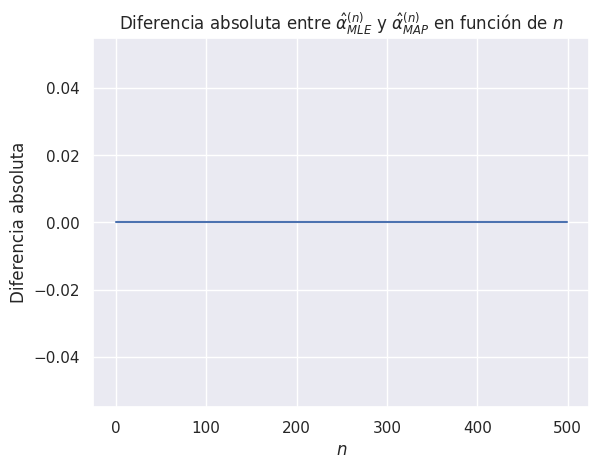

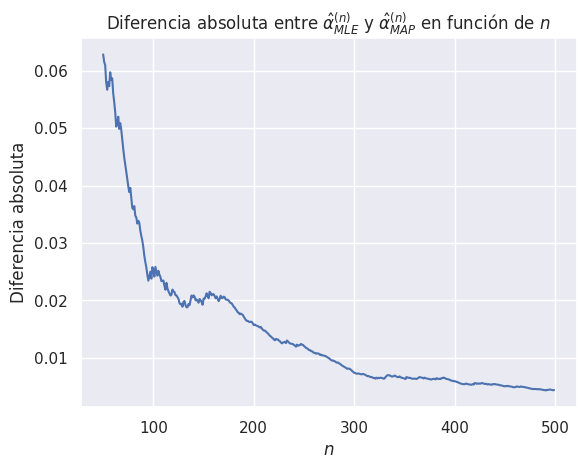

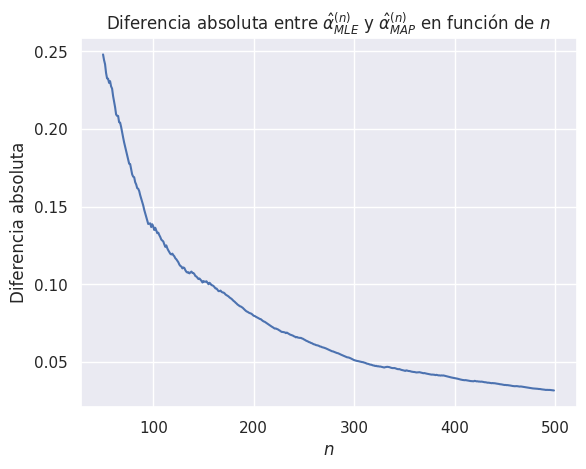

In [ ]:
# Definimos los nuevos k_0 y lambda_0 y el valor inicial de n
init = 50
k_0 = 43
lamb_0 = 23

plot_abs_error()
plot_abs_error(k_,lamb_,init)
plot_abs_error(k_0,lamb_0,init)

**¿Qué puede deducir de los gráficos anteriores? ¿Qué sucede en el caso del prior no-informativo?**
*Respuesta*: 

Como bien dijimos en la parte anterior, se puede ver que en el caso del prior no-informativo, el estimador map es igual al estimador mle. Con respecto a los otros dos casos, se puede ver que en un inicio la diferencia es no menor, pero a medida que aumenta el valor de $n$, el estimador map se acerca cada vez más al estimador mle, siendo su diferencia absoluta cada vez más pequeña. En el caso de del prior de información experta, el estimardor map tiende de forma prácticamente monótona al estimador mle (a partir de $n=50$), siendo la diferencia entre menor a $0.05$ desde $n=75$ aproximadamente, e incluso menor que $0.01$ desde aproximadamente $n=300$, mientras que para el caso de $k=43$ y $\lambda=23$ se ve que el estimador map se acerca mucho a el estimador mle, pero no de forma tan precisa como en el caso con información experta, llegando a ser su diferencia menor a $0.05$ alrededor de $n=300$, cosa que en el otro caso pasaba desde $n=50$.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=558db3a3-7652-4e56-8284-e34f5730b10a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>